In [26]:
## Decision Tree Classifier on Mushroom Dataset from  https://archive.ics.uci.edu/dataset/73/mushroom ##

import pandas as pd
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


In [27]:
# Fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# Data (as pandas dataframes) 
x = mushroom.data.features 
y = mushroom.data.targets 

# Format settings to show more rows and columns when printing dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [28]:
# Encode catagorical data with OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
x_encoded = encoder.fit_transform(x)

# Check encoded data is created correctly 
#print (x_encoded)
#print (encoder.get_feature_names_out())

# Convert back to DataFrame with proper column names
x_encoded = pd.DataFrame(x_encoded, columns=encoder.get_feature_names_out())

# Show x and y data (uncomment to see)
#print (x_encoded)
# print(y.head())

In [29]:
# Train/test split and decision tree classifier with a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=0, stratify=y)

# Create Decision Tree with a speified depth
#clf = DecisionTreeClassifier(max_depth= 3, random_state=0)
clf = DecisionTreeClassifier(random_state=0) # no depth specified
clf.fit(x_train, y_train)

# Evaluate on test set
preds = clf.predict(x_test)
#print ("test accuracy:", accuracy_score(y_test, preds)) # Print test accuracy


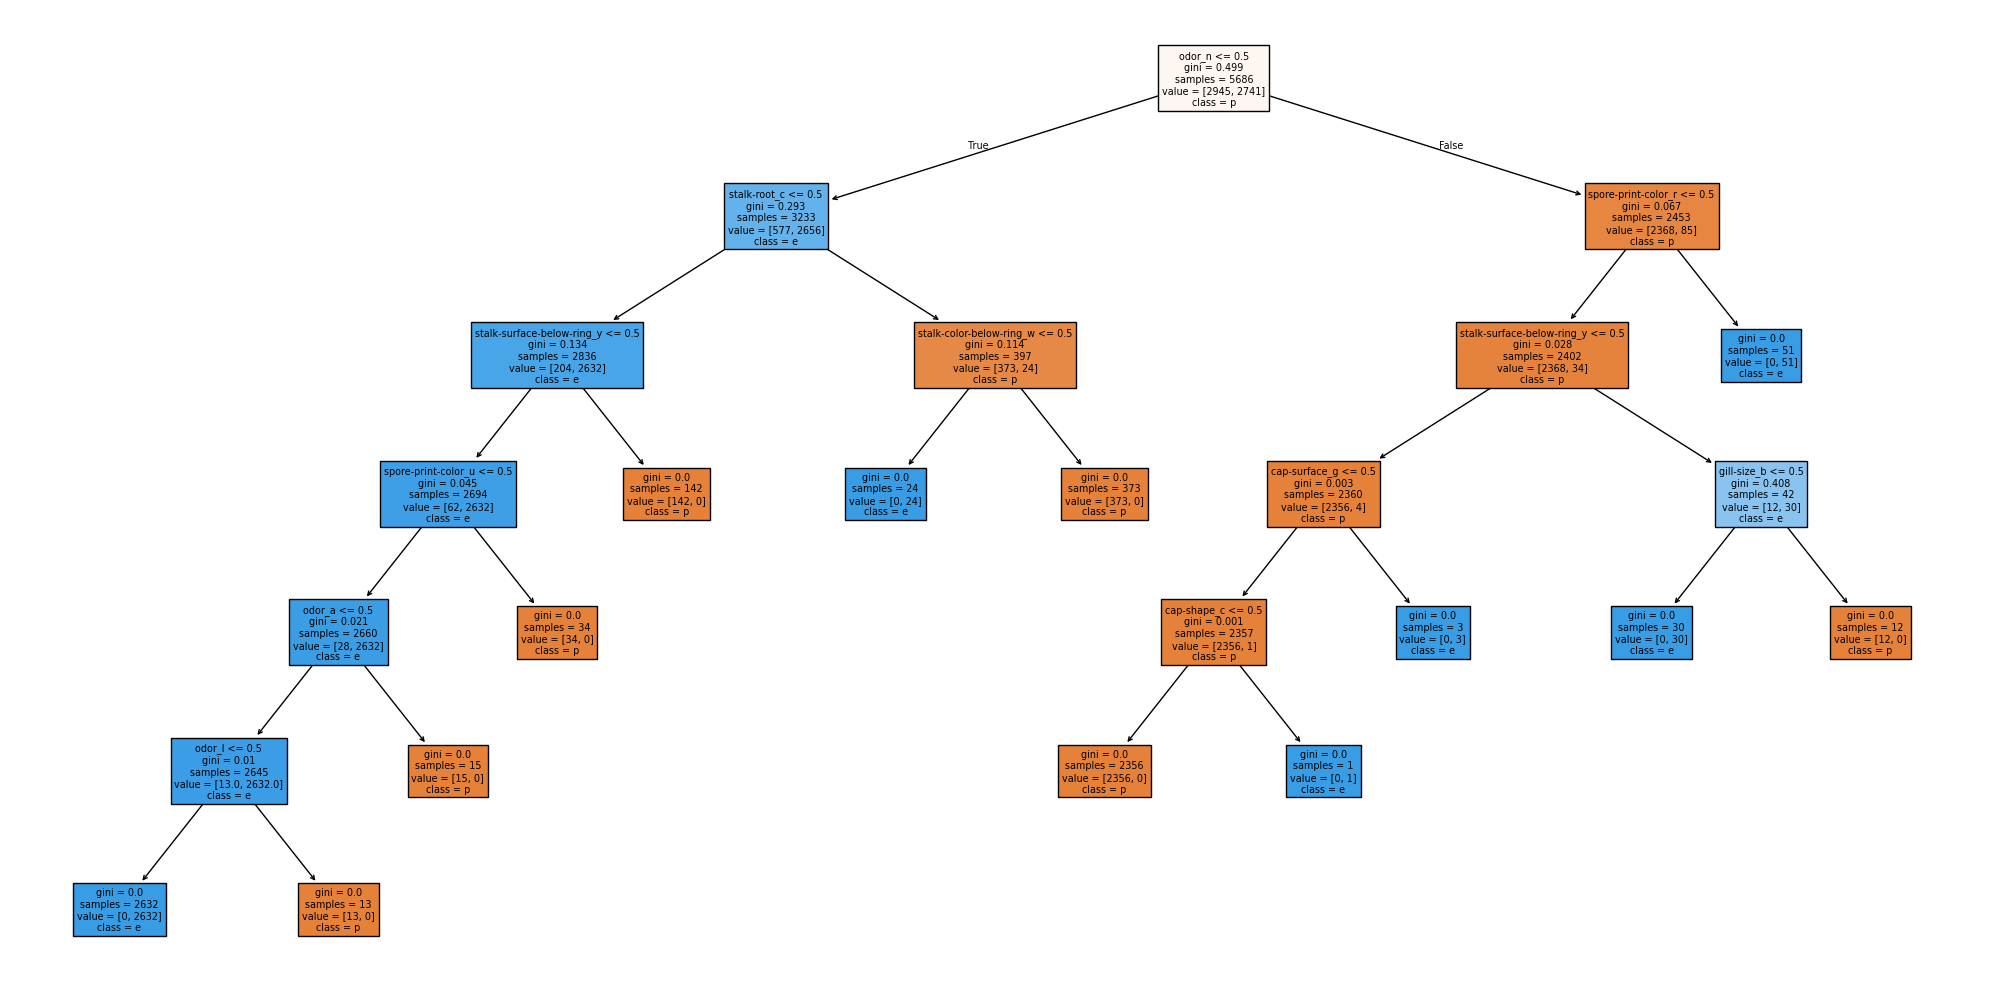

In [30]:
# Plot tree graphically
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=x_encoded.columns, class_names=y['poisonous'].values, filled=True)
plt.tight_layout()
plt.show()

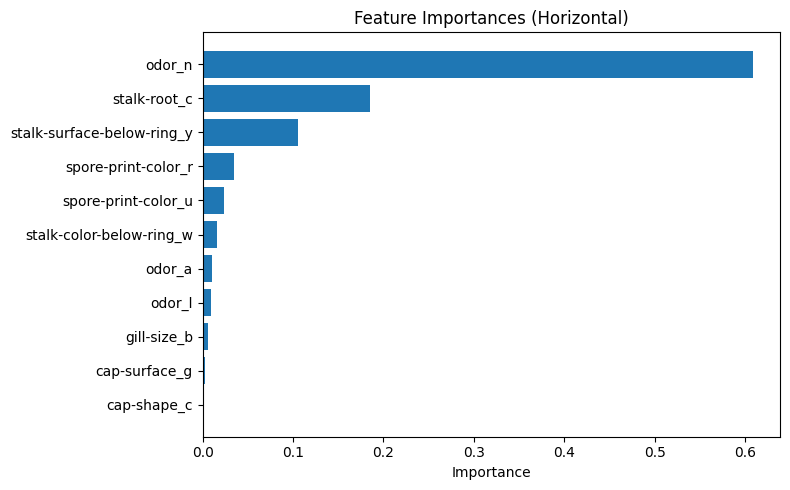

In [31]:
# Find feature importances
feature_names = x_encoded.columns
importances = clf.feature_importances_

# Create a DataFrame for readability
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

feat_imp = feat_imp.sort_values(by="Importance", ascending=True)
#print(feat_imp)

# Show feature importance graphically
feat_imp_nonzero = feat_imp[feat_imp["Importance"] > 0] # only include features that have some importance
plt.figure(figsize=(8,5))
plt.barh(feat_imp_nonzero["Feature"], feat_imp_nonzero["Importance"])

plt.xlabel("Importance")
plt.title("Feature Importances (Horizontal)")
plt.tight_layout()
plt.show()

#print (f"Most important features:{clf.feature_importances_}")

In [32]:
# Define cross-validation
kf = KFold(n_splits = 9, shuffle = True, random_state = 0)

# Cross-validate
cv_scores =  cross_val_score(clf, x_encoded, y, cv=kf)
print (cv_scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
